In [1]:
import lammps_logfile
import numpy as np

In [2]:
log = lammps_logfile.File("log.lammps")

In [3]:
time = log.get("Time") # femtoseconds
time = time/1000 # picoseconds
temp = log.get("Temp") # K
enthalpy = log.get("Enthalpy") # Kcal/mol
density = log.get("Density") # gram/cm^3
pressure = log.get("Press") #atm
vol = log.get("Volume") # angstrom^3
PE = log.get("PotEng") # kcal/mol
TE = log.get("TotEng") #kcal/mol

In [4]:
np.size(time[time<501.97])

251

In [5]:
time = time[251:]
temp = temp[251:]
enthalpy = enthalpy[251:]
density = density[251:]
pressure = pressure[251:]
vol = vol[251:]
PE = PE[251:]
TE = TE[251:]

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

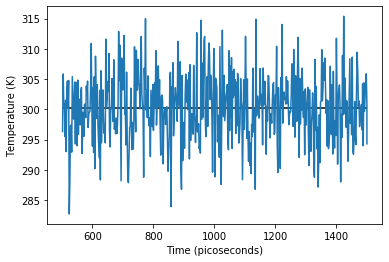

In [7]:
plt.plot(time, temp)
plt.hlines(np.mean(temp),np.min(time), np.max(time))
plt.ylabel('Temperature (K)')
plt.xlabel('Time (picoseconds)')
#plt.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)
plt.show()

In [8]:
np.mean(temp)

300.24007866267465

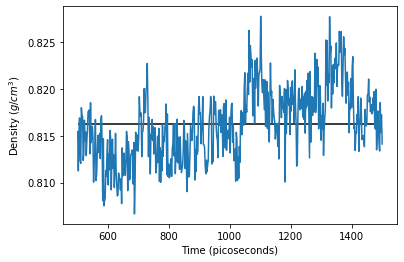

<Figure size 432x288 with 0 Axes>

In [9]:
plt.plot(time, density)
plt.hlines(np.mean(density),np.min(time), np.max(time))
plt.ylabel(r'Density ($g/cm^3$)')
plt.xlabel('Time (picoseconds)')
#plt.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)
plt.show()
plt.savefig("Desnity 300.pdf")

In [10]:
np.mean(density[time<1000])

0.81400605552

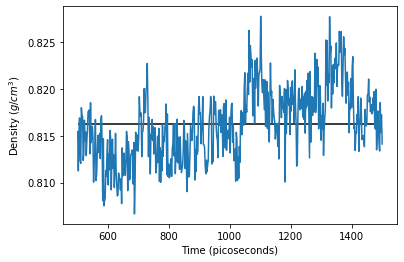

In [11]:
fig, ax = plt.subplots()
ax.plot(time, density)

ax.set(xlabel='Time (picoseconds)', ylabel=r'Density ($g/cm^3$)')
plt.hlines(np.mean(density),np.min(time), np.max(time))
fig.savefig("300K.pdf")
plt.show()

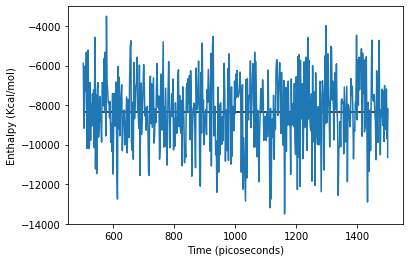

In [12]:
plt.plot(time, enthalpy)
plt.hlines(np.mean(enthalpy),np.min(time), np.max(time))
plt.ylabel('Enthalpy (Kcal/mol)')
plt.xlabel('Time (picoseconds)')
#plt.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)
plt.show()

In [13]:
np.mean(enthalpy)

-8330.94140978044

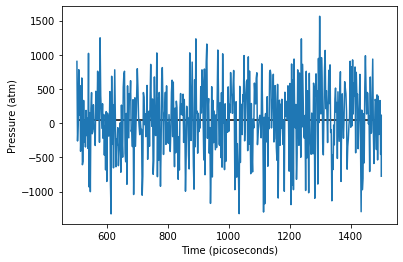

In [14]:
plt.plot(time, pressure)
plt.hlines(np.mean(pressure),np.min(time), np.max(time))
plt.ylabel('Pressure (atm)')
plt.xlabel('Time (picoseconds)')
#plt.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)
plt.show()

In [49]:
np.std(pressure)

521.3667711658849

In [48]:
np.std(density)

0.003821342490943094

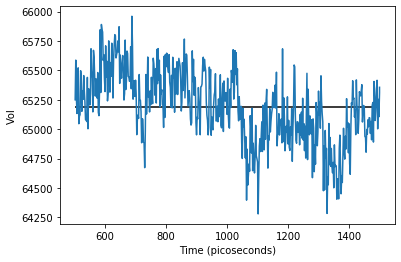

In [16]:
plt.plot(time, vol)
plt.hlines(np.mean(vol),np.min(time), np.max(time))
plt.ylabel('Vol')
plt.xlabel('Time (picoseconds)')
#plt.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)
plt.show()

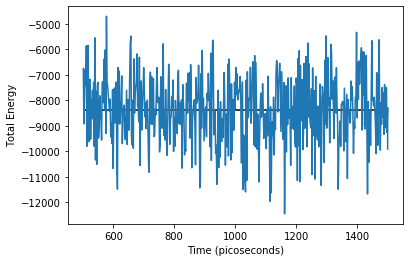

In [17]:
plt.plot(time, TE)
plt.hlines(np.mean(TE),np.min(time), np.max(time))
plt.ylabel('Total Energy')
plt.xlabel('Time (picoseconds)')
#plt.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)
plt.show()

In [18]:
dE = np.mean(PE)

In [19]:
R = 1.9858775e-3 # kcal mol-1 K-1

In [46]:
np.std(temp)

5.612555635059873

In [47]:
dE*-1 + R*300

10163.287612950597

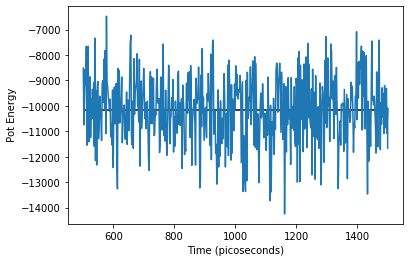

In [21]:
plt.plot(time, PE)
plt.hlines(np.mean(PE),np.min(time), np.max(time))
plt.ylabel(' Pot Energy')
plt.xlabel('Time (picoseconds)')
#plt.hlines(y, xmin, xmax, colors='k', linestyles='solid', label='', *, data=None, **kwargs)
plt.show()

In [22]:
np.mean(PE)

-10162.691849700597

In [42]:
np.std(PE)*4.18/1000

5.528503107030887

In [23]:
vol_flucs = np.mean((vol-np.mean(vol)**2))

In [24]:
vol_flucs = abs(vol_flucs) # angstrom^6
vol_flucs

4249303572.3734307

In [25]:
mean_vol = np.mean(vol)
mean_temp = np.mean(temp)

In [26]:
mean_vol # angstrom^3

65187.18247904192

In [27]:
k_b = 3.29982916e-27 # kcal/K
R = 8.20573660809596e-5 # m3⋅atm⋅K−1⋅mol−1
k = R/6.023e+23

In [28]:
k

1.3624002337864786e-28

In [29]:
isothermal_compressibility = vol_flucs * (1e-30)/(mean_vol * k * mean_temp)

In [30]:
isothermal_compressibility/1000

0.0015936104662568693

In [31]:
R = 1.9858775e-3 # kcal mol-1 K-1

In [32]:
enthalpy_est = np.mean(TE)/1000 + R * mean_temp

In [33]:
enthalpy_est

-7.777429500550834

In [34]:
k = R/6.023e+23
k

3.29715673252532e-27

In [35]:
mean_enthalpy = np.mean(enthalpy)

In [36]:
enthalpy_flucs = np.mean((enthalpy-mean_enthalpy)**2)

In [37]:
C_p = (enthalpy_flucs* 4.184)/(R * mean_temp * mean_temp * 1000)

In [38]:
C_p

74.42189616631312

In [39]:
C_p/1000

0.07442189616631312